This notebook guides you through an example in which we are going to use a [scikit-learn](https://scikit-learn.org/stable/) module to implement logistic regression. The data set we are going to use is the famous iris data set (the other famous one is the MNIST data set that contains 70,000 hand written digits). The iris data set contains the **sepal** and **petal** <font color = red> **length**</font> and <font color = red>**width**</font> of 150 iris flowers of three different species: *Iris-Setosa, Iris-Versicolor* and *Iris-Virginica*. To learn more about this data set, please refer to this Wikipedia webpage https://en.wikipedia.org/wiki/Iris_flower_data_set <br>
<br>
Author: Jiajia Sun at University of Houston, 02/15/2018

Here is a beautiful picture of three kinds of iris flowers. <br>
<img src="iris.png">

# 1. Define our machine learning problem

We are going to train a binary classifier to classify flowers into <font color=red>**Iris-Virginica**</font> and <font color=blue>**non-Virginica**</font> types based on **two** features: ***petal length*** and ***petal width***. Remember that for each of the 150 iris flowers, four features (petal length, petal width, sepal length and sepal width) were measured. But in this example, we are going to use only two features, i.e,. petal length and petal width, to train a classifier. <br>

In reality, properly defining your machine learning problem requires you to understand the large picture of the business that you or your company is working on, as well as the business objectives.

**NOTE:** To keep things from being overly complicated (since this is your first time exploring Sciki-learn), we are not going to split the data into training and validation sets.

# 2. Import and understand the iris data set from Scikit-learn.

In [1]:
import numpy as np   # This should be the first thing you always do whenever you are working on a ML problem
from sklearn import datasets  # import datasets from sklearn
iris = datasets.load_iris() # load iris data set

In [2]:
# let us take a look at the iris data set
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

This looks a little bit messy. But if you look closely, you will recognize that the variable *iris* is a <font color=blue>dictionary</font> that consists of five key-value pairs. If you want to learn more about dictionaries, please refer to this [webpage](https://www.tutorialspoint.com/python/python_dictionary.htm).

In [3]:
# To see a list of the keys in the dictionary
list(iris.keys())  # the iris

['data', 'target', 'target_names', 'DESCR', 'feature_names']

It contains the following keys: <br>
1\. A **DESCR** key describing the dataset. <br>
2\. A **data** key containing an array with one row per instance (or, example), and one column per feature. <br>
3\. A **target** key containing an array with labels. <br>
4\. A **feature_names** key contains a list of the names of the features. In this case, we have four features: sepal length, sepal width, petal length and petal width. <br>
5\. A **target_names** key contains the names of the actual targets. In this case, the target names are actually the names of three kinds of iris flowers. 

Now if you want to see the 'value' corresponding to each key, simply enter the following code: iris['key']. For example,
iris['target']

In [4]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [6]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [8]:
iris['data']

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

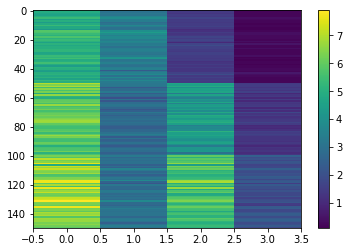

In [12]:
import matplotlib.pyplot as plt
im = plt.imshow(iris['data'],aspect='auto')
plt.colorbar(im)
plt.show()

# 3. Prepare training data

In [13]:
X = iris["data"][:, (2, 3)]  # extracting petal length, petal width values from the third and fouth columns of the 2D array iris['data']
y = (iris["target"] == 2).astype(np.int)   # To convert the true and false words into numerical values, i.e., 1s and 0s

# 4. Training/Learning

Remember that, mathematically speaking, training (or synonymously, learning) is all about minimizing a cost function with respect to the unknown model parameters. We talked about how to minimize a cost function using gradient descent and several of its variants (such as stochastic gradient descent, or mini-batch gradient descent). And you actually implemented BGD and SGD in Lab 1. <br>

Fortunately, you do not have to implement gradient descent (or any of its variants) on your own. The scikit-learn library contains many modules that do the job for you. All you need to do is call the right scikit-learn module and supply the proper parameters to the module. <br>

For example, to implement logistic regression using scikit-learn, you can do the following: 

In [14]:
from sklearn.linear_model import LogisticRegression  # import LogisticRegression module

The next thing you need to do is supply the proper parameters to the module by doing the following:

In [15]:
my_logistic_regression = LogisticRegression(C=10**10, random_state=42)  

In the above code, I supplied two  parameters to LogisticRegression module: C and random_state. In fact, there are in total 14 parameters you can adjust to really tailor the general-purpose LogisticRegression module to your needs. Different parameters will lead to different classification results. One good thing about scikit-learn packages is that, they all come with default parameter values, and these default values are usually good ones. <br>

A little bit about the two parameters I supplied above. The value of the parameter *C* controls how much regularization is imposed on the model parameters (to be learned from training data). The larger the value for C, the less the regularization. You probably have noticed that I set C to extremley large value, which essentially turns off the regularization term. For now, please do not worry about regularization. It is a way to help avoid overfitting. <br>

The other parametr *random_state* is the seed used by the random number generator when shuffling the data. I set it to 42, so that we can get the same radom number. This way, it is easier to compare your results with mine.

Now let us training a logistic regression model. It is actually very easy, with just one line of code.

In [16]:
my_logistic_regression.fit(X,y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Believe it or not, the training is done! <br>
This is probably one of the reasons why scikit-learn is being used so widely. It is just so simple and straightforward to train a model! <br>

Remember that, the model we were trying to learn has the following form: <br>
$$\theta_0 + \theta_1 x_1 + \theta_2 x_2$$
where $x_1$ and $x_2$ represent, respectively, the two features.

Let us now find out what are the model parameter values that were learned.

In [17]:
# To find out the intercept, theta_0
my_logistic_regression.intercept_

array([-45.26062435])

In [18]:
# To find out all the other coefficents,  i.e., theta_1, theta_2, etc.
my_logistic_regression.coef_

array([[  5.7528683 ,  10.44455633]])

In [19]:
# To find out the accuracy,
my_logistic_regression.score(X,y)

0.95999999999999996

The accuracy is defined as follows: <br>
   $$ accuracy = 1 - \frac{1}{m}\sum_{i=1}^M (y_{pred}^{i} - y^{(i)})^2 $$
where $y_{pred}^{i}$ is the predicted label for the $i^{th}$ instance (or example). Both $y_{pred}^i$ and $y^i$ can only take on either 0 or 1.

If you have a set of new measurements, X_new come in, and you want to make predictions based on the peviously learned model, you can simply type: <br>
&nbsp;&nbsp;&nbsp;&nbsp;    *my_logistic_regression.predict(X_new)*

# 5. Visualize the decision boundary

Do not worry about the following codes, if you do not 100% understand them. They are only for the purpose of displaying the data and the decsion boundary.

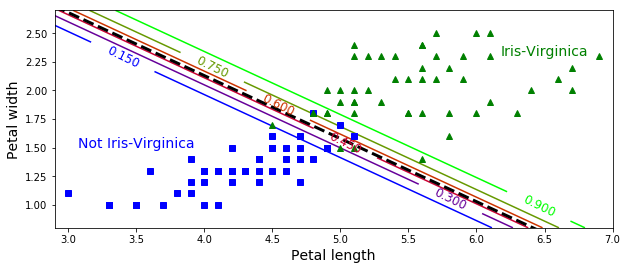

In [21]:
import matplotlib.pyplot as plt
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = my_logistic_regression.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(my_logistic_regression.coef_[0][0] * left_right + my_logistic_regression.intercept_[0]) / my_logistic_regression.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

The decision boundary, marked as dashed black line, look like a good one that separates Virginica from non-Virginica flowers.

# References
To learn more about logistic regression module in scikit-learn, please go to this webpage: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html